## Questão 3 

#### Considere os dados apresentados na tabela abaixo. Obtenha os centróides dos clusters utilizando o algoritmo K-means. No processo de inicialização considere os itens (a) e (b) abaixo.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [8]:
df = pd.read_csv('./dataset.csv')
df = df.drop(columns=['Amostra'])
df.head()

,x1,x2,x3
0,5.82,-4.58,-1.97
1,-4.68,2.16,3.71
2,3.36,-3.19,1.09
3,-7.72,0.88,1.80
4,-7.64,3.06,3.50


#### a) Considere a existência de três clusters nos dados. Inicialize os centróides de forma aleatória

In [9]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler on the dataframe
df_scaled = scaler.fit_transform(df)

# Convert the scaled array back to a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Print the scaled dataframe
df_scaled.head()

,x1,x2,x3
0,0.876375,0.000000,0.358848
1,0.196764,0.764172,0.826337
2,0.717152,0.157596,0.610700
3,0.000000,0.619048,0.669136
4,0.005178,0.866213,0.809053


In [10]:
# Set the number of clusters
num_clusters = 3

# Initialize the K-means model
kmeans = KMeans(n_clusters=num_clusters, init='random')

# Fit the model to the data
kmeans.fit(df_scaled)

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Print the centroids
print(centroids)

[[0.37993528 0.89501134 0.88971193]
 [0.0763754  0.42857143 0.37354497]
 [0.89830097 0.39129819 0.54506173]]


/Users/efrainmpp/Documents/MachineLearning_And_DataMining/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


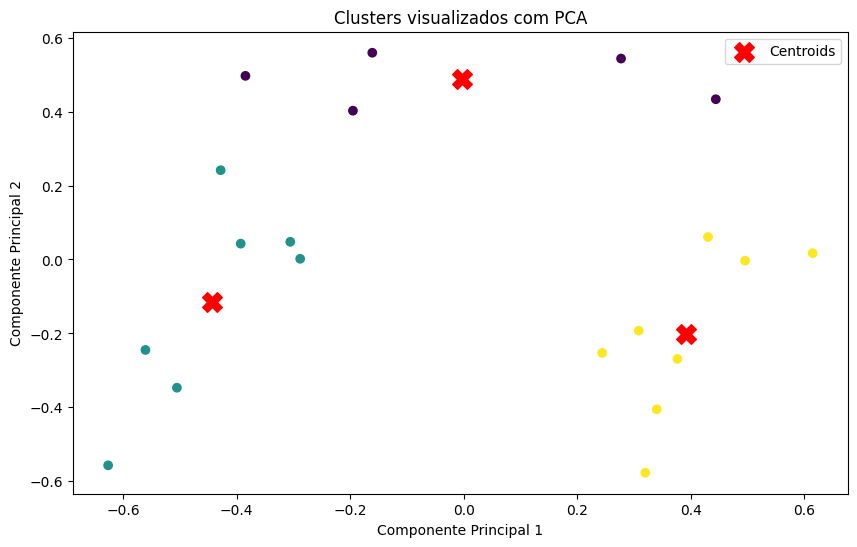

In [16]:
# Realize o PCA para visualização
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)
centroids_pca = pca.transform(centroids)

# Visualize os clusters no espaço PCA
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters visualizados com PCA')
plt.legend()
plt.show()

##### b) Considere que existam três clusters e a inicialização dos centros seja dada por m1=(0,0,0)t , m2=(1,0,1)t , m3=(-1,1,2)t .

In [17]:
# Defina os centroids iniciais
initial_centroids = np.array([
    [0, 0, 0],   # m1
    [1, 0, 1],   # m2
    [-1, 1, 2]   # m3
])

# Initialize the K-means model with a different initialization
# Aplique o K-means com os centroids iniciais definidos
kmeans2 = KMeans(n_clusters=3, init=initial_centroids, n_init=1, random_state=0).fit(df)

# Fit the model to the data
kmeans2.fit(df_scaled)

# Get the centroids of the clusters
centroids2 = kmeans.cluster_centers_

# Print the centroids
print(centroids2)

[[0.37993528 0.89501134 0.88971193]
 [0.0763754  0.42857143 0.37354497]
 [0.89830097 0.39129819 0.54506173]]


/Users/efrainmpp/Documents/MachineLearning_And_DataMining/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


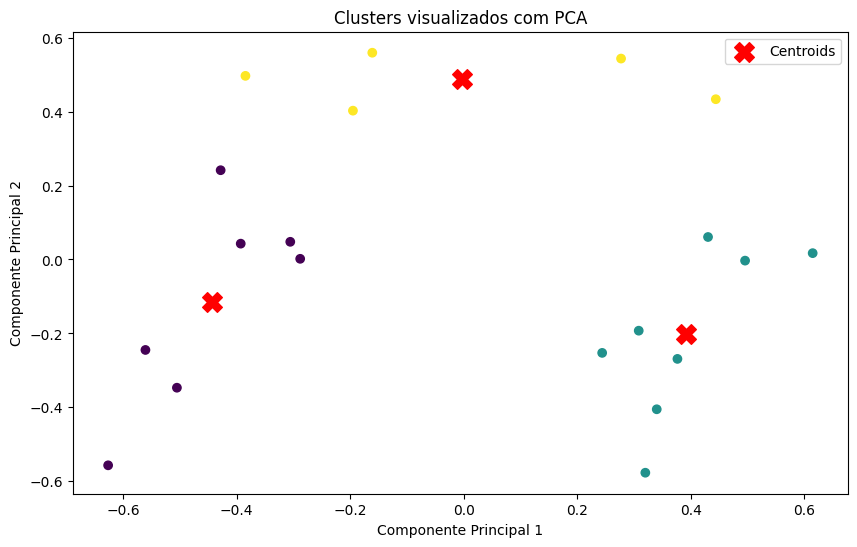

In [19]:
# Realize o PCA para visualização
pca2 = PCA(n_components=2)
data_pca = pca2.fit_transform(df_scaled)
centroids_pca2 = pca2.transform(centroids2)

# Visualize os clusters no espaço PCA
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans2.labels_, cmap='viridis', marker='o')
plt.scatter(centroids_pca2[:, 0], centroids_pca2[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters visualizados com PCA')
plt.legend()
plt.show()